# Sistemas Inteligentes
## Maestría en Tecnologías de la Información
## Dr. José Antonio Orizaba Trejo
Fecha: 05 de Febrero 
Alumno: Anaid Trejo Huerta
Código de alumno: 304510062

# Actividad 5. Procesamiento de Datos
Este cuaderno de trabajo aborda los elementos esenciales del preprocesamiento de datos: limpieza, normalización, ingeniería de características (feature engineering) y preparación para modelos predictivos.

## 1.Generación de Datos Sintéticos.
Para este ejercicio, crearemos un set de datos sintético que represente información de clientes, incluyendo variables numéricas y categóricas con algunos problemas comunes (valores nulos, nulo-valores, etc.).

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Generación de datos

In [3]:
np.random.seed(42)
n_samples = 1000

data = {
    'id': range(1, n_samples + 1),
    'edad': np.random.randint(18, 80, n_samples),
    'ingresos': np.random.normal(50000, 15000, n_samples),
    'puntuacion_credito': np.random.randint(300, 850, n_samples),
    'genero': np.random.choice(['M', 'F', 'Otro'], n_samples),
    'compras_previas': np.random.randint(0, 50, n_samples),
    'activo': np.random.choice([0, 1], n_samples, p=[0.3,0.7])
}

df = pd.DataFrame(data)

# Introducir Ruido y valores nulos

In [6]:
df.loc[np.random.choice(df.index, 50), 'edad'] = np.nan
df.loc[np.random.choice(df.index, 30), 'ingresos'] = np.nan
df.loc[np.random.choice(df.index, 20), 'ingresos'] = df['ingresos'] * 10

print("Primeras filas del dataset sintético")
df.head()

Primeras filas del dataset sintético


,id,edad,ingresos,puntuacion_credito,genero,compras_previas,activo
0,1,56.0,70585.666948,541,Otro,9,0
1,2,69.0,39833.208605,531,Otro,2,0
2,3,46.0,67302.978080,583,Otro,44,1
3,4,32.0,44374.840574,499,Otro,26,0
4,5,60.0,39587.810697,378,M,34,1


# 2. Limpieza de Datos
La limpieza de datos implica tratar con valores faltantes, duplicados y outliers que podrían sesgar el análisis.


2.1 Manejo de valores nulos

In [7]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
id                     0
edad                  48
ingresos              28
puntuacion_credito     0
genero                 0
compras_previas        0
activo                 0
dtype: int64


Imputación: llenar edad con la mediana e ingresos con la media

In [8]:
df['edad'] = df['edad'].fillna(df['edad'].median())
df['ingresos'] = df['ingresos'].fillna(df['ingresos'].mean())

2.2 Manejo de outliers (valores atíficos)
Usaremos el método del rango intercuartílico (IQR) para ingresos

In [10]:
Q1 = df['ingresos'].quantile(0.25)
Q3 = df['ingresos'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

 Filtrar o capear outliers

In [11]:
df['ingresos'] = np.where(df['ingresos'] > upper_bound, upper_bound, df['ingresos'])
df['ingresos'] = np.where(df['ingresos'] < lower_bound, lower_bound, df['ingresos'])

print("\nLimpieza completada.")


Limpieza completada.


# 3. Normalización / Escalamiento
Muchos algoritmos son sensibles a la escala de los datos. Aquí aplicaremos un Standard Scaler

In [15]:
scaler = StandardScaler()
cols_to_scale = ['edad', 'ingresos', 'puntuacion_credito', 'compras_previas']

df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Datos normalizados (primeras 5 filas):")
df_scaled[cols_to_scale].head()

Datos normalizados (primeras 5 filas):


,edad,ingresos,puntuacion_credito,compras_previas
0,0.347661,1.144543,-0.253223,-1.101475
1,1.081839,-0.722660,-0.316300,-1.592986
2,-0.217091,0.945228,0.011701,1.356078
3,-1.007744,-0.446905,-0.518147,0.092193
4,0.573562,-0.737560,-1.281380,0.653920


# 4.Feature Engineering (Ingeniería de Características)
Creammos nuevas variables que aporten valor y transformamos variables categóricas.

Creación nuevas características

In [16]:
df_scaled['ingreso_por_edad'] = df_scaled['ingresos'] / (df_scaled['edad'] + 5)

Encoding de variables categóricas (One-Hot Encoding para Género)

In [17]:
df_final = pd.get_dummies(df_scaled, columns=['genero'],drop_first=True)

print("Columnas tras Feature Engineering:")
print(df_final.columns.tolist())
df_final.head()

Columnas tras Feature Engineering:
['id', 'edad', 'ingresos', 'puntuacion_credito', 'compras_previas', 'activo', 'ingreso_por_edad', 'genero_M', 'genero_Otro']


,id,edad,ingresos,puntuacion_credito,compras_previas,activo,ingreso_por_edad,genero_M,genero_Otro
0,1,0.347661,1.144543,-0.253223,-1.101475,0,0.214027,False,True
1,2,1.081839,-0.722660,-0.316300,-1.592986,0,-0.118823,False,True
2,3,-0.217091,0.945228,0.011701,1.356078,1,0.197626,False,True
3,4,-1.007744,-0.446905,-0.518147,0.092193,0,-0.111943,False,True
4,5,0.573562,-0.737560,-1.281380,0.653920,1,-0.132332,True,False


# 5.Visualización de Datos
Agregamos una gráfica de barras para visualizar la distribución de una variable, por ejemplo, los ingresos promedio por género.

Configuración del estilo

In [18]:
sns.set_theme(style="whitegrid")

Gráfica de barras: Ingresos promedio por género

/tmp/ipykernel_549/1387352915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genero', y='ingresos', data=df, estimator=np.mean, palette='viridis')


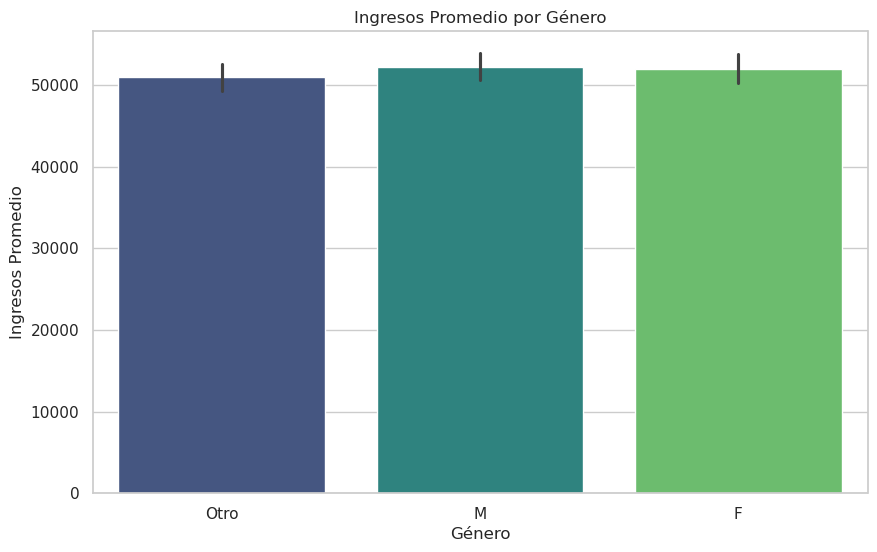

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='genero', y='ingresos', data=df, estimator=np.mean, palette='viridis')
plt.title('Ingresos Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos Promedio')
plt.show()

# 6. Preparación de datos para predicción
Dividimos el set de datos en entrenamiento y prueba, definiendo nuestra variable objetivo (target)

Definir X e Y

In [24]:
X = df_final.drop(['id', 'activo'], axis=1)
y = df_final['activo']
# dividir en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del set de entrenamiento: {X_train.shape}")
print(f"Tamaño del set de prueba: {X_test.shape}")

Tamaño del set de entrenamiento: (800, 7)
Tamaño del set de prueba: (200, 7)
